# Fundamentals of Data Analysis
##  Project 2018
### DATE DUE ON/BEFORE 14 DEC 2018

Problem statement

The box plot is common in data analysis for investigating individual numerical variables.
In this project, you will investigate and explain box plots and their uses. The boxplot
function from the Python package matplotlib.pyplot can be used to create box plots.
Your submission should be in the form of a repository containing a Jupyter notebook in
which you detail your findings. In your notebook, you should:
• Summarise the history of the box plot and situations in which it used.
• Demonstrate the use of the box plot using data of your choosing.
• Explain any relevant terminology such as the terms quartile and percentile.
• Compare the box plot to alternatives.


### Started 18 November 2018 by creating the Jupyter Notebook file(s)

## 1.  Summarise the history of the box plot and situations in which it used.

The Box plot.

According to a man called TUKEY put forward the design of the Box Plot in 1977  [#1]_page_204.

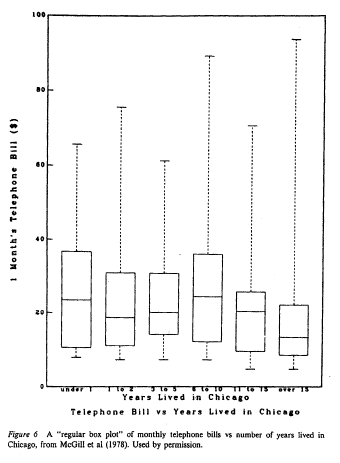

As with any picture, it can be worth a thousand words.
As long as the design of the picture is clearly understandable by those who are expected to see it then it can impart knowledge in a standard way without the use of any written language. The only text required is a description of the numbers it is describing.

The man credited with its invention was John Wilder Tukey. [#3]  (1915-2000) [#4]

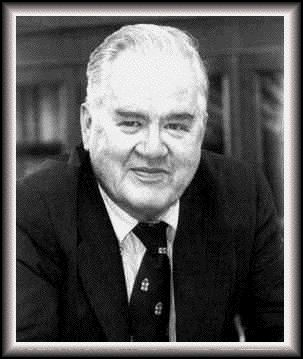

Tukey put forward that 5 important descriptive statistics could be shown by the Box Plot.

Minimum, The 25% quartile, the Median, the 75% Quartile and the Maximum.
Another descriptive statistic is the Inter-Quartile Range known as the IQR.
This is a calculation of the 75% Quartile - 25% Quartile.

Its interesting that he work in BELL LABS [#5] because a well known man involved in quality control called Shewart also worked there [#6] and another well known man in quality control called Demming was influenced by Shewart.  It seems BELL LABS created the atmosphere for many inventions for statistics and quality control.

The box plot can be used whereever numbers ("variables" in Q.C) are used. 
As it is used to describe the descriptive statistics of a series of numbers then whenever the Min,Max,Median can be put as a number then the box plot can be used.
Tukey himself uses the cost of telephone bills over several years in his 1978 graph [#1-page-203].
The box plot can be used as a single graph or a group of box-plots to compare one sub-set of data to another as long as the two sub-sets are related but separated enough so that the comparison is logical and valid.[#7]
for example: comparing the output of 25KG bags of cement off a production line where multiple machines are bagging the cement.
All bags can be measured and graphed, however the output from each machine can be measured and compaed to each other because the machines should all be producing 25KGs and therefore several side-by-side box-plots can be used to compare the min,max,median,25% and 75% quartiles. Ad if there is a difference then adjustments to the relevant machine(s) can be made.

A variation of the box-plot is a notched box-plot where the 'waist' of the box plot is tapered at a certain point where the taper starts represents a confidence interval Median of  the Median +/- 1.58(IQR / SQRT(n) [#8]

[#1] https://onlinelibrary.wiley.com/doi/epdf/10.1002/j.2333-8504.1981.tb01261.x  
    visited: 20181118  
    'Graphical Data Analysis', Page 204, 2nd paragraph, Wainer & Thissen.

[#2] Pages 162-168, Elementary Statistics 7th edition, Blumna, ISBN, 978-0-07-009178-8, McGrawHill, 2009, New York.

[#3] http://mnstats.morris.umn.edu/introstat/history/w98/Tukey.html  
     visited: 20181118

[#4] https://www.britannica.com/science/box-and-whisker-plot  
     visited: 20181118
   
[#5] https://en.wikipedia.org/wiki/Bell_Labs#1940s   
     visited: 20181118
     
[#6] https://en.wikipedia.org/wiki/Walter_A._Shewhart  
     visited: 20181118

[#7] http://asq.org/learn-about-quality/data-collection-analysis-tools/overview/box-whisker-plot.html
     visited: 20181118
     
[#8] http://exjansen.com/views/2003/statpharm/st01.pdf  
     visited: 20181113
     
    

## 2. Plot the interesting aspects of the dataset.

### Code to demonstrate the sets of data
### import various libraries 

import csv

import math

import matplotlib.pyplot as plt


In [17]:
### The following section sets-up the variables/parameters used in the program

In [85]:
filename = "anscombe.csv"
# setup the arrays
field = []
x1 = []
x2 = []
x3 = []
x4 = []
xtmp = []
y1 = []
y2 = []
y3 = []
y4 = []
ytmp = []
tmplist = []
f1 = 0.1
f2 = 0.1
f3 = 0.1
f4 = 0.1
f5 = 0.1
f6 = 0.1
f7 = 0.1
f8 = 0.1
idx = 0
line_in = '   '
line_count1 = 0
line_count2 = 0
tmps1 = ""
tmps2 = ""
i = 0
xmax = 0
xmin = 9999
ymax = 0
ymin = 9999

x1.clear()
x2.clear()
x3.clear()
x4.clear()
y1.clear()
y2.clear()
y3.clear()
y4.clear()
tmplist.clear()

left  = 0.1    # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.1   # the amount of height reserved for white space between subplots

In [86]:
### The next section opens the input file and processes it in the waiting arrays in memory

In [87]:
with open(filename) as f:
    print("# Opening: ",filename)  
    while( len(line_in)>1):
        # retrieve one line of the file and strip and whitespace off the line
        line_in = f.readline().strip()
        
        # filter out the quotes from the incoming text/string
        tmps1 = ""
        idx = 0
        while ( idx < len(line_in) ):
            if ( line_in[idx] != "\""):
                tmps1 = tmps1+line_in[idx]
            idx=idx+1
        line_in = tmps1
        
                
        # increment the line in counter
        line_count1 = line_count1+1
        # only if the line is useable ...
        if ( len(line_in)>0 ):        
            # split the input line up into data fields
            field=[]
            for w in line_in.split(","):
                field.append(w)  
            # only accept lines that begin with a numeric
            # this will filter out lines that could cause errors                        
            if ( line_in[0] != ','):
                # increment the used line counter and inform the user
                line_count2 = line_count2+1     
                print("# Using  : ",f"{line_count2:2}", " = ",line_in )  
                
                # convert the strings into float numbers
                #idx = int(field(0))
                f1 = float(field[1])
                f2 = float(field[2])
                f3 = float(field[3])
                f4 = float(field[4])
                f5 = float(field[5])
                f6 = float(field[6])
                f7 = float(field[7])
                f8 = float(field[8])      
                # add these converted numbers onto the array of float numbers
                x1.append(f1)
                x2.append(f2)
                x3.append(f3)
                x4.append(f4)
                y1.append(f5)
                y2.append(f6)
                y3.append(f7)
                y4.append(f8)                   

# Opening:  anscombe.csv
# Using  :   1  =  1,10,10,10,8,8.04,9.14,7.46,6.58
# Using  :   2  =  2,8,8,8,8,6.95,8.14,6.77,5.76
# Using  :   3  =  3,13,13,13,8,7.58,8.74,12.74,7.71
# Using  :   4  =  4,9,9,9,8,8.81,8.77,7.11,8.84
# Using  :   5  =  5,11,11,11,8,8.33,9.26,7.81,8.47
# Using  :   6  =  6,14,14,14,8,9.96,8.1,8.84,7.04
# Using  :   7  =  7,6,6,6,8,7.24,6.13,6.08,5.25
# Using  :   8  =  8,4,4,4,19,4.26,3.1,5.39,12.5
# Using  :   9  =  9,12,12,12,8,10.84,9.13,8.15,5.56
# Using  :  10  =  10,7,7,7,8,4.82,7.26,6.42,7.91
# Using  :  11  =  11,5,5,5,8,5.68,4.74,5.73,6.89


In [88]:
    # close the file 
    print("# Closing: ",filename)
    f.close()
    # announce to the screen that the file is closed
    print("# End of file")    

# Closing:  anscombe.csv
# End of file


In [89]:
### This section idenitifes the MAX and Min values for both X and Y arrays

In [90]:
    # importing where it is needed -  importing at the top of the file did not work
    import numpy as np
    
    maxx = 0
    minx = 99999
    maxy = 0
    miny = 99999
    xmax = 0
    xmin = 9999
    ymax = 0
    ymin = 9999
    
    x1min = 9999
    x2min = 9999
    x3min = 9999
    x4min = 9999
    x1max = 0
    x2max = 0
    x3max = 0
    x4max = 0
    y1min = 9999
    y2min = 9999
    y3min = 9999
    y4min = 9999
    y1max = 0
    y2max = 0
    y3max = 0
    y4max = 0
    
    x1max = max(x1)
    x2max = max(x2)
    x3max = max(x3)
    x4max = max(x4)
    xmax = max(x1max,x2max,x3max,x4max)

    y1max = max(y1)
    y2max = max(y2)
    y3max = max(y3)
    y4max = max(y4)
    ymax = max(y1max,y2max,y3max,y4max)
    x1min = min(x1)
    x2min = min(x2)
    x3min = min(x3)
    x4min = min(x4)
    xmin = min(x1min,x2min,x3min,x4min)

    y1min = min(y1)
    y2min = min(y2)
    y3min = min(y3)
    y4min = min(y4)
    ymin = min(y1min,y2min,y3min,y4min)

    xmin_regr = xmin
    ymin_regr = (0.5 * xmin) + 3
    
    xmax_regr = xmax
    ymax_regr = (0.5 * xmax) + 3  
    
    xregression = np.arange(xmin_regr,xmax_regr,0.1)
    yregression = (0.5 * xregression) + 3

In [91]:
    ### The next section deals with informing the user of the values encountered and MAX and MIN values found

In [92]:
    # inform the user of how many lines used
    print("# Line count: Total:"+str(line_count1)+" Usable:"+str(line_count2))
    print("x1:",x1)
    print("x2:",x2)
    print("x3:",x3)
    print("x4:",x4)
    print("y1:",x1)
    print("y2:",y2)
    print("y3:",y3)
    print("y4:",y4)
    # now have 8 arrays for the plotting of the graphs
    print("Max X:",f"{xmax:4}")
    print("Min X:",f"{xmin:4}")
    print("Max Y:",f"{ymax:4}")
    print("Min Y:",f"{ymin:4}")

# Line count: Total:13 Usable:11
x1: [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
x2: [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
x3: [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
x4: [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0]
y1: [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y2: [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]
y3: [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
y4: [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
Max X: 19.0
Min X:  4.0
Max Y: 12.74
Min Y:  3.1


In [99]:
    import matplotlib.pyplot as plt
    plt.title('Anscombes Quartet')
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

    plt.xlabel('X1')
    plt.ylabel('Y1')
    # give the plot some room on the plot space
    plt.xlim(xmin-1,xmax+1)
    plt.ylim(ymin-1,ymax+1)   
    # draw the regression line first
    plt.plot(xregression, yregression,'y.')
    # draw the graph of the data set
    plt.scatter(x1,y1)
    #plt.show()

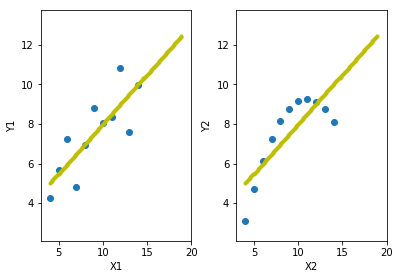

In [100]:
    plt.subplot(1, 2, 2)
    
    plt.xlabel('X2')
    plt.ylabel('Y2')
    # give the plot some room on the plot space
    plt.xlim(xmin-1,xmax+1)
    plt.ylim(ymin-1,ymax+1)   
    # draw the regression line first
    plt.plot(xregression, yregression,'y.')
    # draw the graph of the data set
    plt.scatter(x2,y2)
    plt.show()

In [101]:
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
    plt.xlabel('X3')
    plt.ylabel('Y3')
    # give the plot some room on the plot space
    plt.xlim(xmin-1,xmax+1)
    plt.ylim(ymin-1,ymax+1)   
    # draw the regression line first
    plt.plot(xregression, yregression,'y.')
    # draw the graph of the data set
    plt.scatter(x3,y3)
    #plt.show()

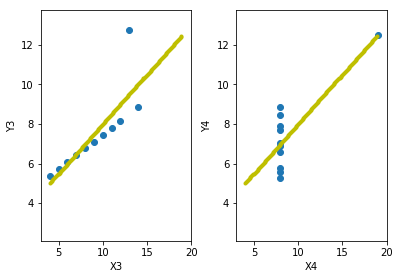

In [102]:
    plt.subplot(1, 2, 2)
    plt.xlabel('X4')
    plt.ylabel('Y4')
    # give the plot some room on the plot space
    plt.xlim(xmin-1,xmax+1)
    plt.ylim(ymin-1,ymax+1)   
    # draw the regression line first
    plt.plot(xregression, yregression,'y.')
    # draw the graph of the data set   
    plt.scatter(x4,y4)
    plt.show()

In [97]:
    # now import the stats library
    import statistics as stats

In [60]:
    # Display the decriptive stats of each array/list
    # use a temp variable to enable quick re-use of code
    xtmp = x1
    strtmp = "X1"
    xstdev = stats.stdev(xtmp)
    xpvar  = stats.pvariance(xtmp)
    print("Descriptive stats of",strtmp," are")
    print("Median  : ",stats.median(xtmp))
    print("Average : ",stats.mean(xtmp))
    print("Min/Max : ",max(xtmp),min(xtmp))
    print("Range   : ",max(xtmp) - min(xtmp))
    print("Std Dev : ",f"{xstdev:4}")
    print("Variance: ",f"{xpvar:4}")
    print("")
    xtmp = x2
    strtmp = "X2"
    xstdev = stats.stdev(xtmp)    
    xpvar  = stats.pvariance(xtmp)
    print("Descriptive stats of",strtmp," are")
    print("Median  : ",stats.median(xtmp))
    print("Average : ",stats.mean(xtmp))
    print("Min/Max : ",max(xtmp),min(xtmp))
    print("Range   : ",max(xtmp) - min(xtmp))
    print("Std Dev : ",f"{xstdev:4}")
    print("Variance: ",f"{xpvar:4}")
    print("")
    xtmp = x3
    strtmp = "X3"
    xstdev = stats.stdev(xtmp)    
    xpvar  = stats.pvariance(xtmp)
    print("Descriptive stats of",strtmp," are")
    print("Median  : ",stats.median(xtmp))
    print("Average : ",stats.mean(xtmp))
    print("Min/Max : ",max(xtmp),min(xtmp))
    print("Range   : ",max(xtmp) - min(xtmp))
    print("Std Dev : ",f"{xstdev:4}")
    print("Variance: ",f"{xpvar:4}")
    print("")
    xtmp = x4
    strtmp = "X4"
    xstdev = stats.stdev(xtmp)    
    xpvar  = stats.pvariance(xtmp)
    print("Descriptive stats of",strtmp," are")
    print("Median  : ",stats.median(xtmp))
    print("Average : ",stats.mean(xtmp))
    print("Min/Max : ",max(xtmp),min(xtmp))
    print("Range   : ",max(xtmp) - min(xtmp))
    print("Std Dev : ",f"{xstdev:4}")
    print("Variance: ",f"{xpvar:4}")
    print("")    

Descriptive stats of X1  are
Median  :  9.0
Average :  9.0
Min/Max :  14.0 4.0
Range   :  10.0
Std Dev :  3.3166247903554
Variance:  10.0

Descriptive stats of X2  are
Median  :  9.0
Average :  9.0
Min/Max :  14.0 4.0
Range   :  10.0
Std Dev :  3.3166247903554
Variance:  10.0

Descriptive stats of X3  are
Median  :  9.0
Average :  9.0
Min/Max :  14.0 4.0
Range   :  10.0
Std Dev :  3.3166247903554
Variance:  10.0

Descriptive stats of X4  are
Median  :  8.0
Average :  9.0
Min/Max :  19.0 8.0
Range   :  11.0
Std Dev :  3.3166247903554
Variance:  10.0



In [32]:
    # to calculate/display the descriptive statistics of the data set
    xtmp = y1
    strtmp = "Y1"
    xstdev = stats.stdev(xtmp)
    xpvar  = stats.pvariance(xtmp)
    print("# 3.")
    print("Descriptive stats of",strtmp," are")
    print("Median  : ",stats.median(xtmp))
    print("Average : ",stats.mean(xtmp))
    print("Min/Max : ",max(xtmp),min(xtmp))
    print("Range   : ",max(xtmp) - min(xtmp))
    print("Std Dev : ",f"{xstdev:4}")
    print("Variance: ",f"{xpvar:4}")
    print("")
    xtmp = y2
    strtmp = "Y2"
    xstdev = stats.stdev(xtmp)
    xpvar  = stats.pvariance(xtmp)
    print("Descriptive stats of",strtmp," are")
    print("Median  : ",stats.median(xtmp))
    print("Average : ",stats.mean(xtmp))
    print("Min/Max : ",max(xtmp),min(xtmp))
    print("Range   : ",max(xtmp) - min(xtmp))
    print("Std Dev : ",f"{xstdev:4}")
    print("Variance: ",f"{xpvar:4}")
    print("")
    xtmp = y3
    strtmp = "Y3"
    xstdev = stats.stdev(xtmp)
    xpvar  = stats.pvariance(xtmp)
    print("Descriptive stats of",strtmp," are")
    print("Median  : ",stats.median(xtmp))
    print("Min/Max : ",max(xtmp),min(xtmp))
    print("Average : ",stats.mean(xtmp))
    print("Range   : ",max(xtmp) - min(xtmp))
    print("Std Dev : ",f"{xstdev:4}")
    print("Variance: ",f"{xpvar:4}")
    print("")    
    xtmp = y4
    strtmp = "Y4"
    xstdev = stats.stdev(xtmp)
    xpvar  = stats.pvariance(xtmp)
    print("Descriptive stats of",strtmp," are")
    print("Median  : ",stats.median(xtmp))
    print("Min/Max : ",max(xtmp),min(xtmp))
    print("Average : ",stats.mean(xtmp))
    print("Range   : ",max(xtmp) - min(xtmp))
    print("Std Dev : ",f"{xstdev:4}")
    print("Variance: ",f"{xpvar:4}")
    print("")

Descriptive stats of Y1  are
Median  :  7.58
Average :  7.500909090909091
Min/Max :  10.84 4.26
Range   :  6.58
Std Dev :  2.031568135925815
Variance:  3.752062809917356

Descriptive stats of Y2  are
Median  :  8.14
Average :  7.500909090909091
Min/Max :  9.26 3.1
Range   :  6.16
Std Dev :  2.0316567355016177
Variance:  3.752390082644628

Descriptive stats of Y3  are
Median  :  7.11
Min/Max :  12.74 5.39
Average :  7.5
Range   :  7.3500000000000005
Std Dev :  2.030423601123667
Variance:  3.747836363636364

Descriptive stats of Y4  are
Median  :  7.04
Min/Max :  12.5 5.25
Average :  7.500909090909091
Range   :  7.25
Std Dev :  2.0305785113876023
Variance:  3.7484082644628103



### 4. Explain why the dataset is interesting, referring to the plots and statistics above.

In the dataset as already stated, Anscombe deliberately set out to generate data that had different elements but the overall descriptive statistics would be the same thereby giving the impression that the data was the same but when graphed the answer is clearly not the same.

The Variance or Standard deviation normally gives am impression of the width of a bell curve and if the variance or standard deviation are the same then one would already be under the impression that there wasn’t much difference between them ( F-test etc). 

The averages are also very close to each other which would also lead a person to consider that the middle of the bell curve may well be in the same position too. 

The medians are not exactly the same but are very close.

All of these similarities would lead someone to consider that they are very similar.

Only when they are plotted, does it become clear that they are not the same.

## references used:

https://learnandlearn.com/python-programming/python-reference/find-calculate-median-python-using-median-function  
to find out what funcions are available in the STATISTICS package.   
visited: 29-10-2017

https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python   
visited: 29-10-2017   
to refine the display and how to display two graphs beside each other.

## LOG of activities
.LOG   
22:27 14/10/2018   

COURSE.ID=52446 -- FUNDAMENTALS OF DATA ANALYSIS    
STUDENT.ID=G00364787   
STUDENT.NAME=PAUL KEARNEY   

LOG FILE OF ACTIVITIES   
   
Fundamentals of Data Analysis   
Assignment 2018   
DATE DUE ON/BEFORE 11 NOV 2018   
   
This is a log file created to track/record activity related to the assignment.   
   
FOR INFO:   
The .LOG at the top will cause NOTEPAD to auto-insert the date and time on a new line when the file is opened. This is handy for keeping track of the date&time.   

22:37 14/10/2018   
Revisited the CSV input processing from last semeter's project.   
This will be needed to input the dataset into memory for processing.   
   
23:57 14/10/2018   
Running into some trouble.   
Cannot convert a string to a float due to the quotes still being either side of each CSV value.   
Need to get rid of the quote marks from each CSV value first.   
   
Found a website that might provide the answer   
https://stackoverflow.com/questions/39981986/to-process-csv-data-set-in-jupyter-notebook   
   
Didnt help me at all.   
   
00:44 15/10/2018   
Decided to write my own code to handle the Quote-marks in the incoming text myself.   
Can now drop the Quote marks from each incoming line of text.   
Now when the inoming txt is split, the values are stand alone values that will easily convert.   
   
   
01:03 15/10/2018   
Now have the 8 arrays loaded with the floating numbers ready for plotting   
   
01:37 15/10/2018   
According to the picture at    
http://2.bp.blogspot.com/_IFzDPHUxHI0/SG0ocfCh01I/AAAAAAAAADI/VAqSLJd0dLc/s400/anscombe_quartet.gif   
All four plots are scatter-plots.   
   

01:50 15/10/2018   
Going to start on generating Scatter plots one by one then amalgamate them into the one 'canvas' afterwards.

02:03 15/10/2018   
Noticed that the X and Y axes seems to be set to same min and max levels.
This will need the program to check each incoming value and update the min and max value of X and Y accordingly.

Also noticed that at least two of the arrays have an unusual value in them that doesnt look that its part of a uniform sequence but pictures of the graphs on the internet also have this unusual dot in the graphs.   
Added in   x1.clear()  etc to the setup to ensure that no previous values exist in each of the eight x and y arrays. This is because i first thought that the unusual value was actually a 'left over' in memory from a previous run.

02:18 15/10/2018   
Routines written to scan through each list to check for max and min values each X and Y array


02:21 15/10/2018   
Small addition to announce max and min values to user

02:34 15/10/2018   
take a break

03:16 15/10/2018   
How to set the Xmax Xmin window for a pyplot...
https://stackoverflow.com/questions/17907977/pyplot-automatically-setting-x-axis-range-to-min-max-x-values-passed-to-plott
This should make all four plots look to have the same Axes.

03:45 15/10/2018   
plt.xlim(xx,yy)  not working


03:45 15/10/2018   
Time to stop for the night


22:43 16/10/2018   
Created the file  GMIT-FUND-D-A-Assignment2018-README.TXT as the README.MD file to describe files conatined in the directory.

20:51 29/10/2018   
Revisited project to check up on bits needed to be finished.

20:54 29/10/2018   
Found website 
https://learnandlearn.com/python-programming/python-reference/find-calculate-median-python-using-median-function
to explain how to get the median

21:05 29/10/2018   
Jupyter is not recognising  plt as the pseudonym for MATPLOTLIB   
Local 'import' at time of running the plots fixed this - just dont know why it just doesnt work in the usual place.
Perhaps my I need to do the same with  import statistics  too?

22:03 29/10/2018   
Back working again.   
Strange.   
Rearrange the calculating of the various descrptive stats especially the min & max vales for each array/list.

22:04 29/10/2018   
Make copy & filename change
Upload to GITHUB    

22:08 29/10/2018   
Slowly not becoming a fan of Jupyter but we'll see.  

22:15 29/10/2018   
More reasearch into the dataset itself.
Visted  https://heapanalytics.com/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story
After reading this article, I felt that I needed to add  VARIANCE into the descriptive stats.
Also,  "A linear regression (line of best fit) for each dataset follows the equation y = 0.5x + 3"

22:26 29/10/2018   
Side by Side plots
Visted https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python

22:38 29/10/2018   
Now to write what I have found out about the dataset.

23:49 29/10/2018   
Adding references from log file into jupyter notebook

00:21 30/10/2018   
revisted drawing the regression line.
looked at the video "Two plots on one set of axes "  again
Regression line on all plots now.

00:23 30/10/2018   
Revisted the "Side-by-side plots video" again to make sure I was doing it right.

00:31 30/10/2018   
Visited https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
to find out about spacing between the plots.
Didnt do much for me.

00:47 30/10/2018   
And had another go and got a change in display.
Now to figure out the 'right' arrangement
Spacing adjusted.


21:22 10/11/2018   
Back again to do a cleanup prior to final version.

21:25 10/11/2018   
Discovered when removing the  triple hash "###" from the Markdown cells, that sometimes the machine will append one line onto the previous line thereby ruining the intended layout.
Discovered that by placing some "spaces" on the end of the first line that the second line will remain where it is intended to be.
